## This work is to demonstrate the trend and seasonal components in the sales data

In [ ]:
!/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip

In [ ]:
!pip install polars

In [ ]:
!pip install prophet

In [ ]:
!pip install plotly

In [ ]:
!pip install nbformat

In [ ]:
!pip install statsmodels

In [1]:
import polars as pl
import seaborn as sn
import plotly as plt

import pandas as pd
from prophet import Prophet

/Users/vjvelpula/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Sample Data

In [2]:
df = pd.read_csv('data/Horlicks Data.csv')
df.head()

,Month,Week,GMV,YT - Imps,YT - Clicks,YT Spends - Perf,YT Spends - Perf.1,YT Spend-Brand,Meta Spends - RnF,Meta Spend - Perf,...,Hotstar - Clicks,Hotstar - Spends,Jio - Impressions,Jio - Clicks,Jio - Spend,Amazon DSP,Amazon,Flipkart,Zepto,TV
0,Jan,Week 1,377138,17062034,154320,1431543,1431543,955418,476869,0,...,0,0,0,0,0,70749,274696,0,46240,3881264
1,Jan,Week 2,408881,18026967,170217,1433093,1433093,1088861,709289,148967,...,0,0,0,0,0,97404,148403,0,46240,3881264
2,Jan,Week 3,434582,17009143,167485,1497935,1497935,881627,707121,419958,...,0,0,0,0,0,120738,171236,0,46240,3881264
3,Jan,Week 4,293222,7525415,72860,717846,717846,334952,519216,243806,...,0,0,0,0,0,75674,111970,0,46240,3881264
4,Feb,Week 5,1062352,6624822,46521,585642,585642,341164,427380,54889,...,1646,67325,73425,2345,5868,11316,153028,2270,111037,4491486


In [3]:
df2 = df[['Month', 'Week', 'GMV']]

In [2]:
df3 = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df3.head()


,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [3]:
#We fit the model by instantiating a new Prophet object.
m = Prophet()
m.fit(df3)

23:38:50 - cmdstanpy - INFO - Chain [1] start processing
23:38:53 - cmdstanpy - INFO - Chain [1] done processing


In [4]:
#Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made.
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [5]:
#The predict method will assign each row in future a predicted value which it names yhat.
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.211654,7.448467,8.922523
3266,2017-01-16,8.536682,7.836741,9.260290
3267,2017-01-17,8.324099,7.629832,9.044110
3268,2017-01-18,8.156744,7.440034,8.913406
3269,2017-01-19,8.168699,7.496055,8.908146


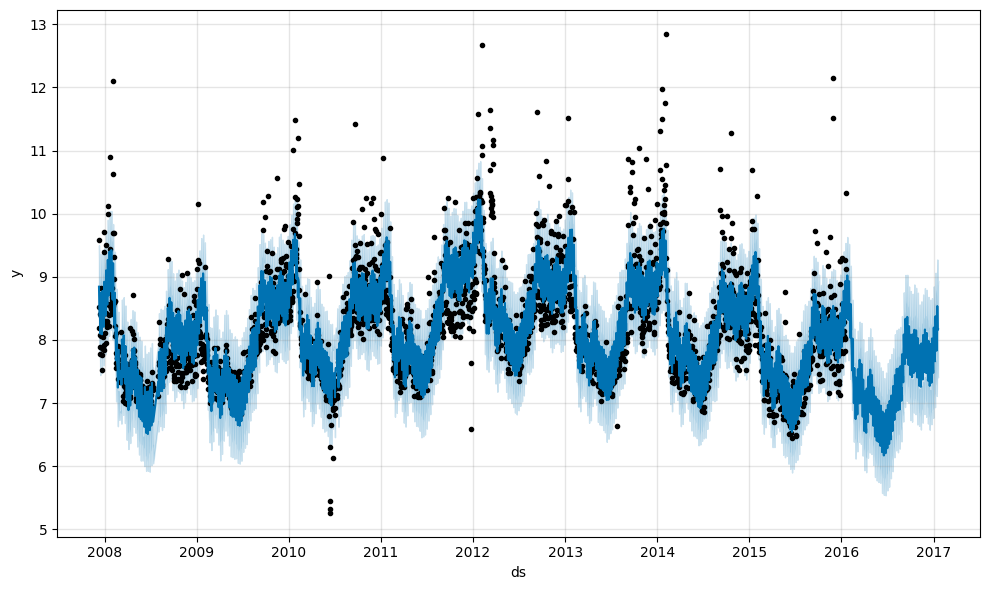

In [6]:
#plot the forecast
fig1 = m.plot(forecast)


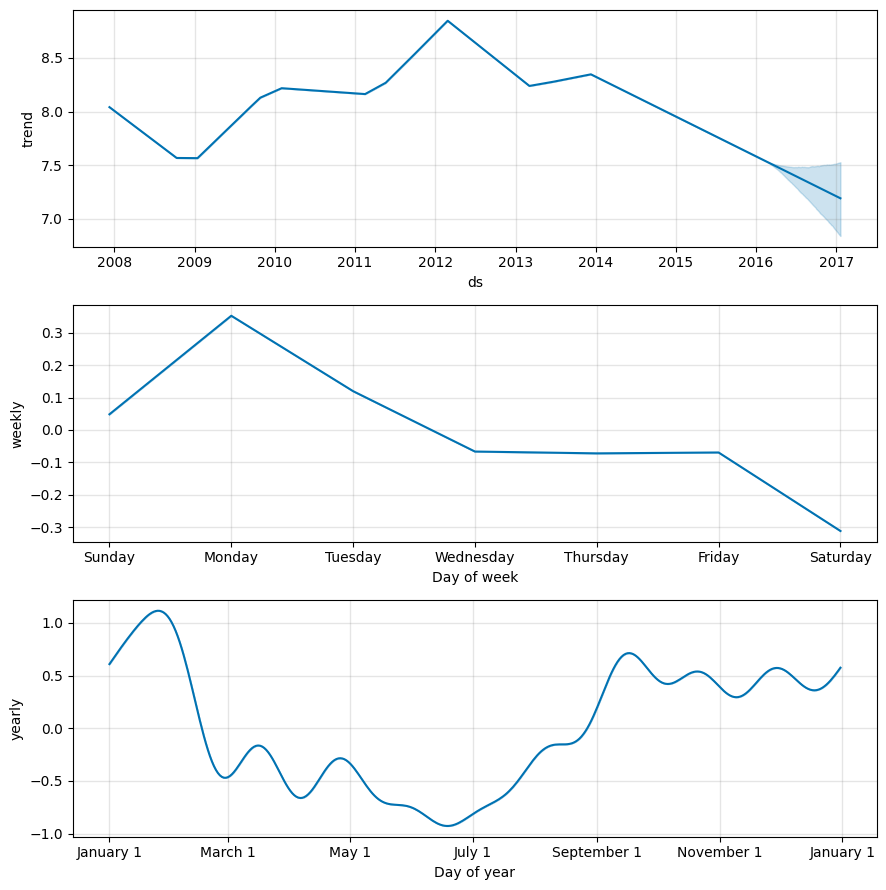

In [7]:
#To see the forecast components
fig2 = m.plot_components(forecast)



In [6]:
#More Interactive Visual
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [7]:
plot_components_plotly(m, forecast)

# Walmart Sales Data

In [2]:
walmart_data = pd.read_csv('data/Walmart_Sales.csv')
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [24]:
walmart_data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
sns.set_style("darkgrid")

plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)


<Axes: >

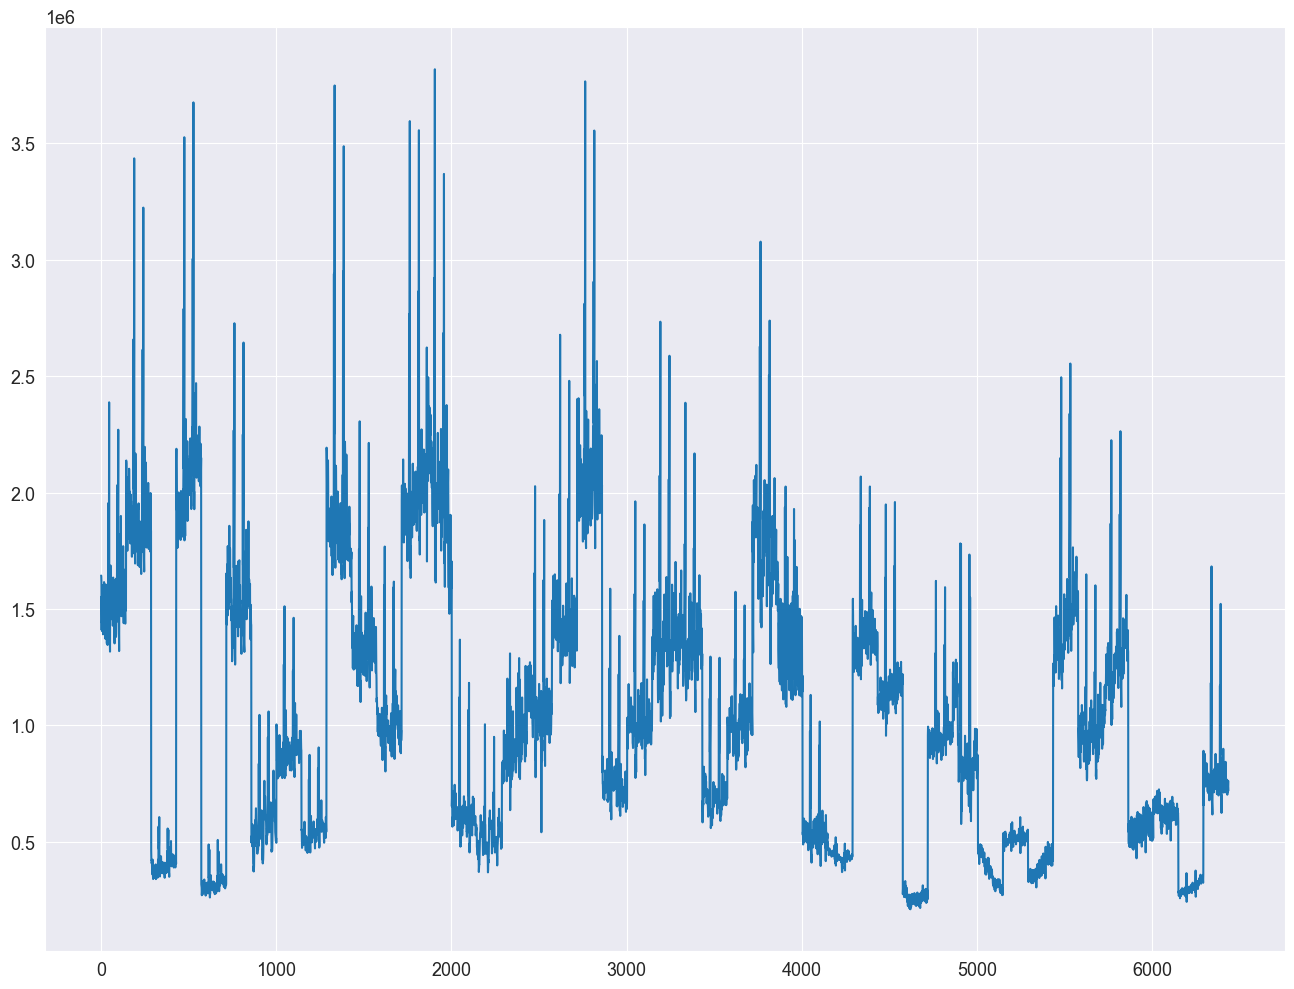

In [23]:
walmart_data['Weekly_Sales'].plot()

<Axes: >

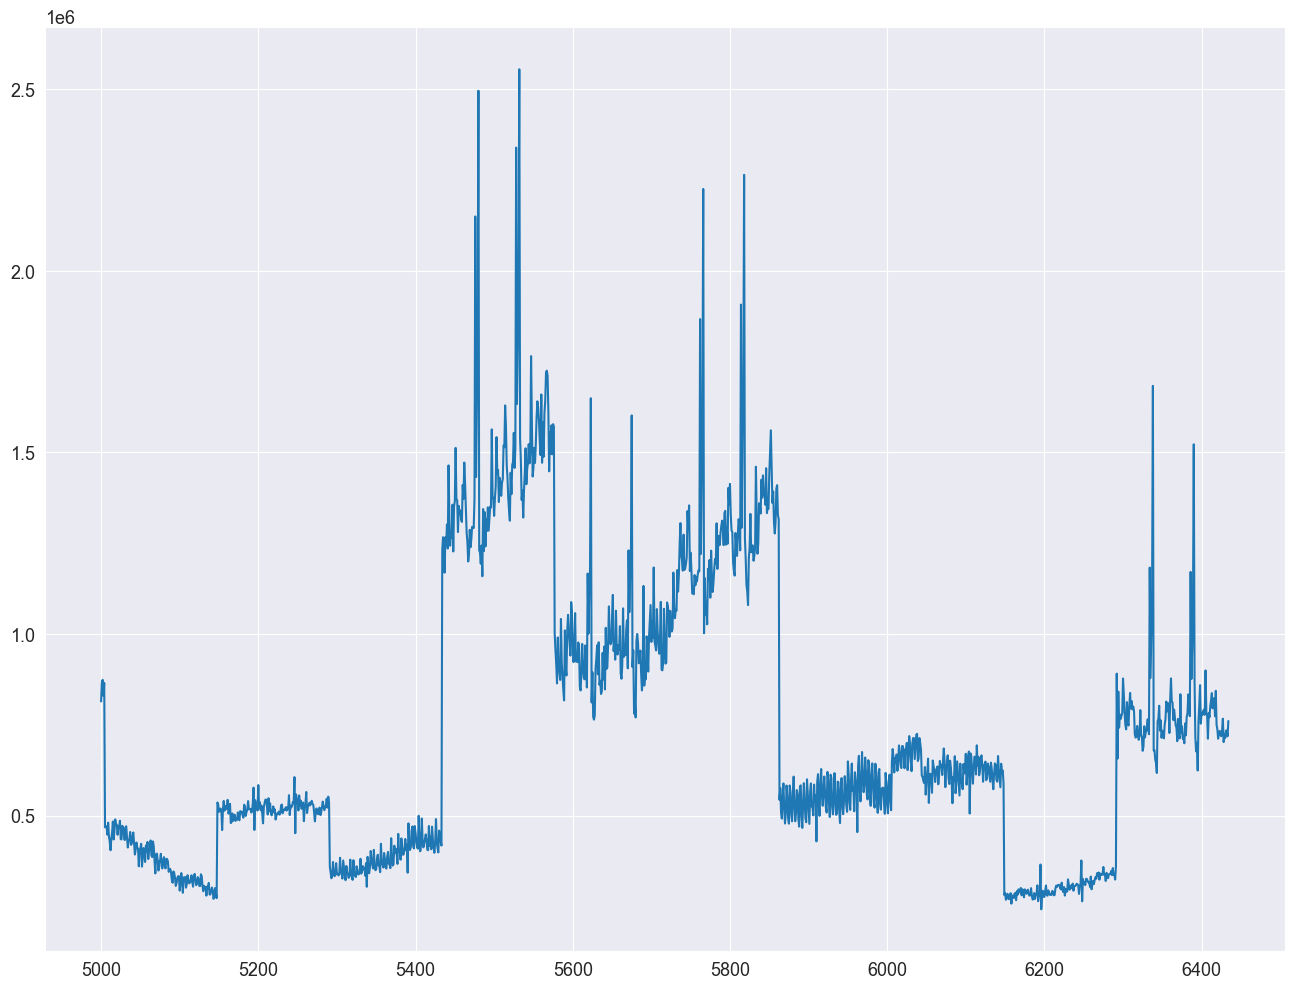

In [34]:
w_data = walmart_data[5000:]
w_data['Weekly_Sales'].plot()

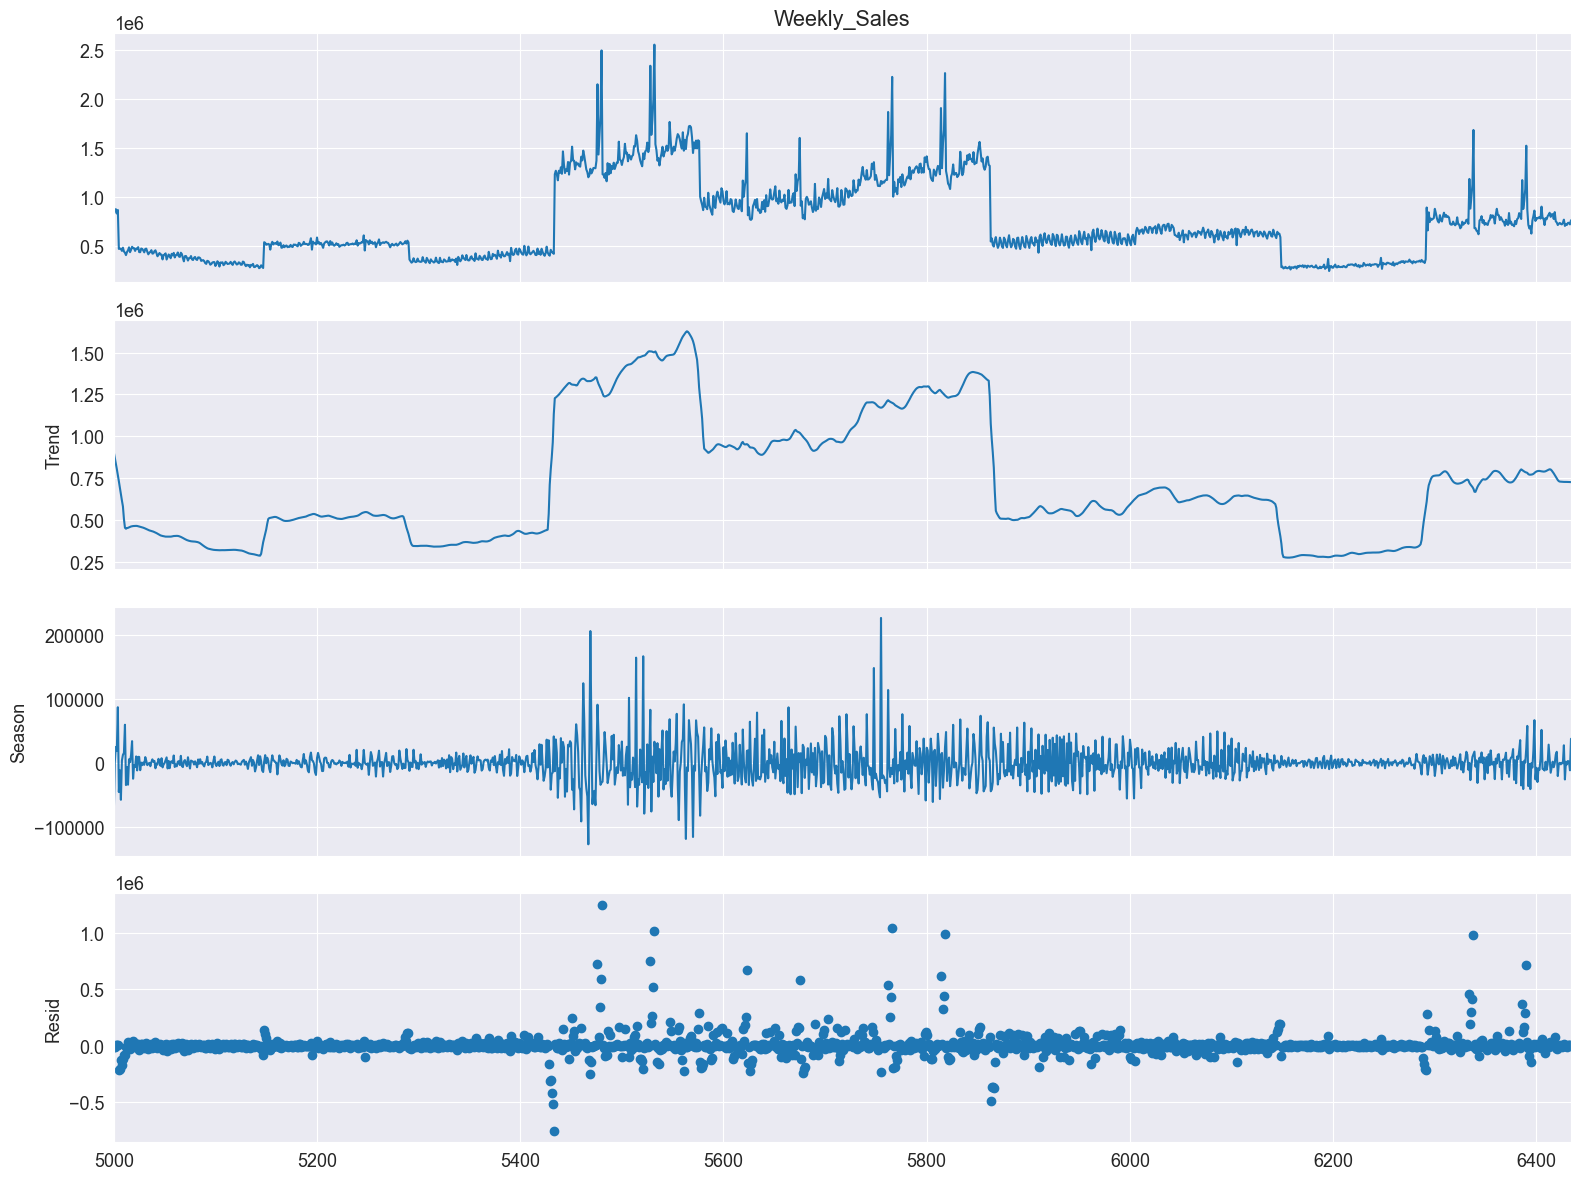

In [35]:
from statsmodels.tsa.seasonal import STL

stl = STL(w_data['Weekly_Sales'], period=7, robust=True)
res = stl.fit()
fig = res.plot()


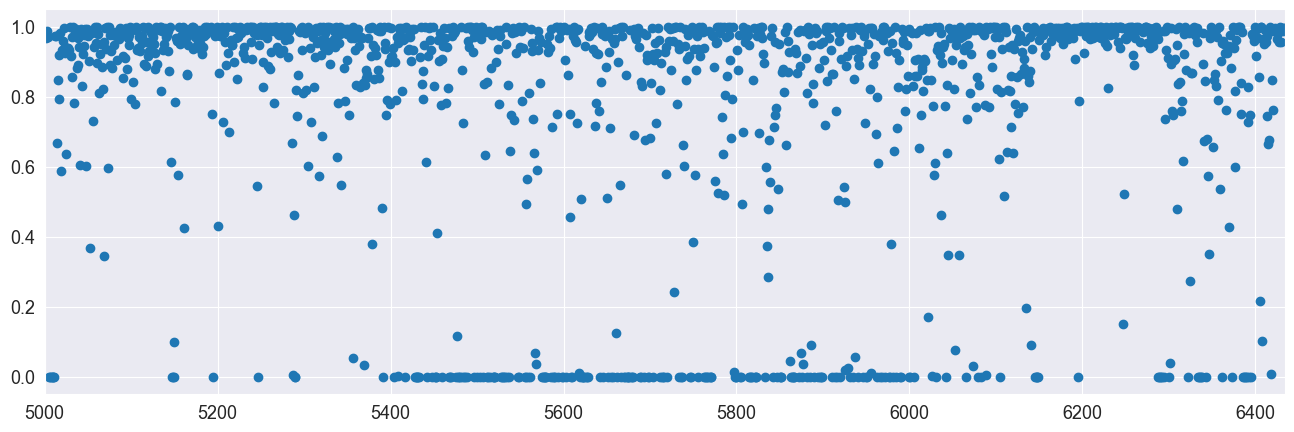

In [36]:
fig = plt.figure(figsize=(16, 5))
lines = plt.plot(res.weights, marker="o", linestyle="none")
ax = plt.gca()
xlim = ax.set_xlim(w_data['Weekly_Sales'].index[0], w_data['Weekly_Sales'].index[-1])


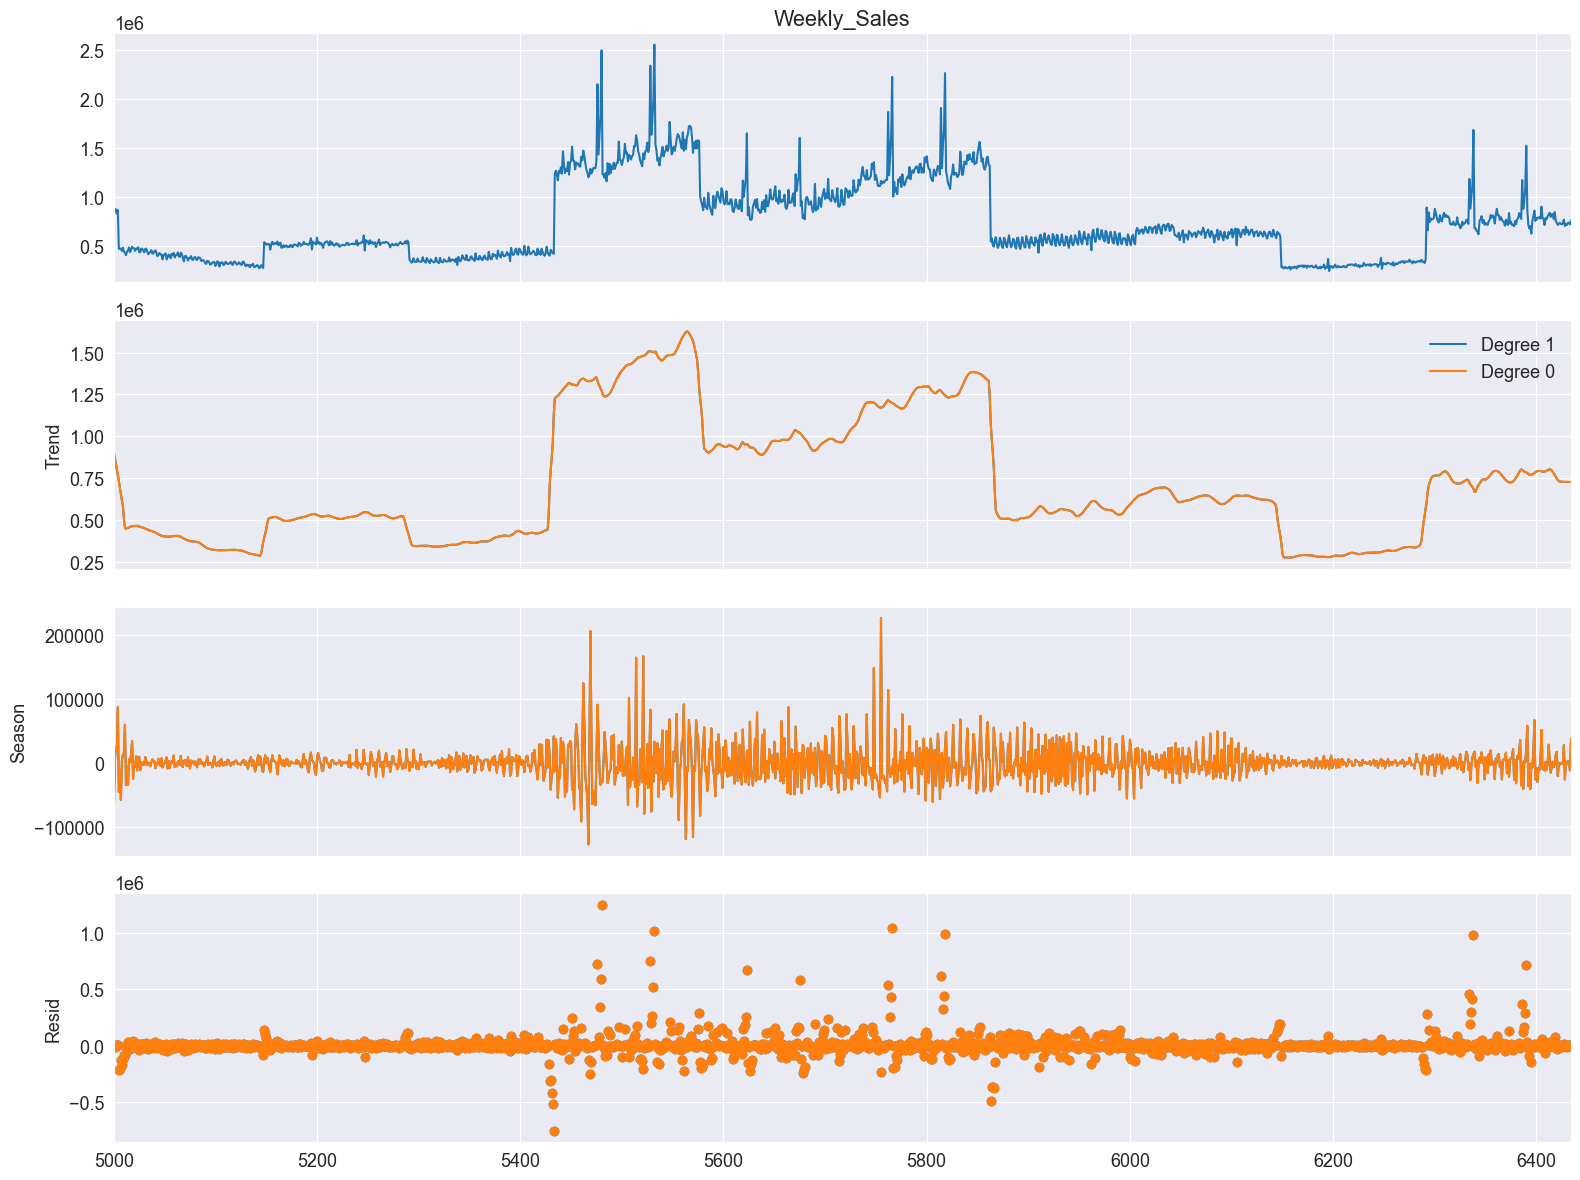

In [38]:
#LOESS degree
def add_stl_plot(fig, res, legend):
    """Add 3 plots from a second STL fit"""
    axs = fig.get_axes()
    comps = ["trend", "seasonal", "resid"]
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == "resid":
            ax.plot(series, marker="o", linestyle="none")
        else:
            ax.plot(series)
            if comp == "trend":
                ax.legend(legend, frameon=False)
                
stl2 = STL(
    w_data['Weekly_Sales'], period=7, seasonal_deg=0, trend_deg=0, low_pass_deg=0, robust=True
)
res_deg_0 = stl.fit()
fig = res.plot()
add_stl_plot(fig, res_deg_0, ["Degree 1", "Degree 0"])


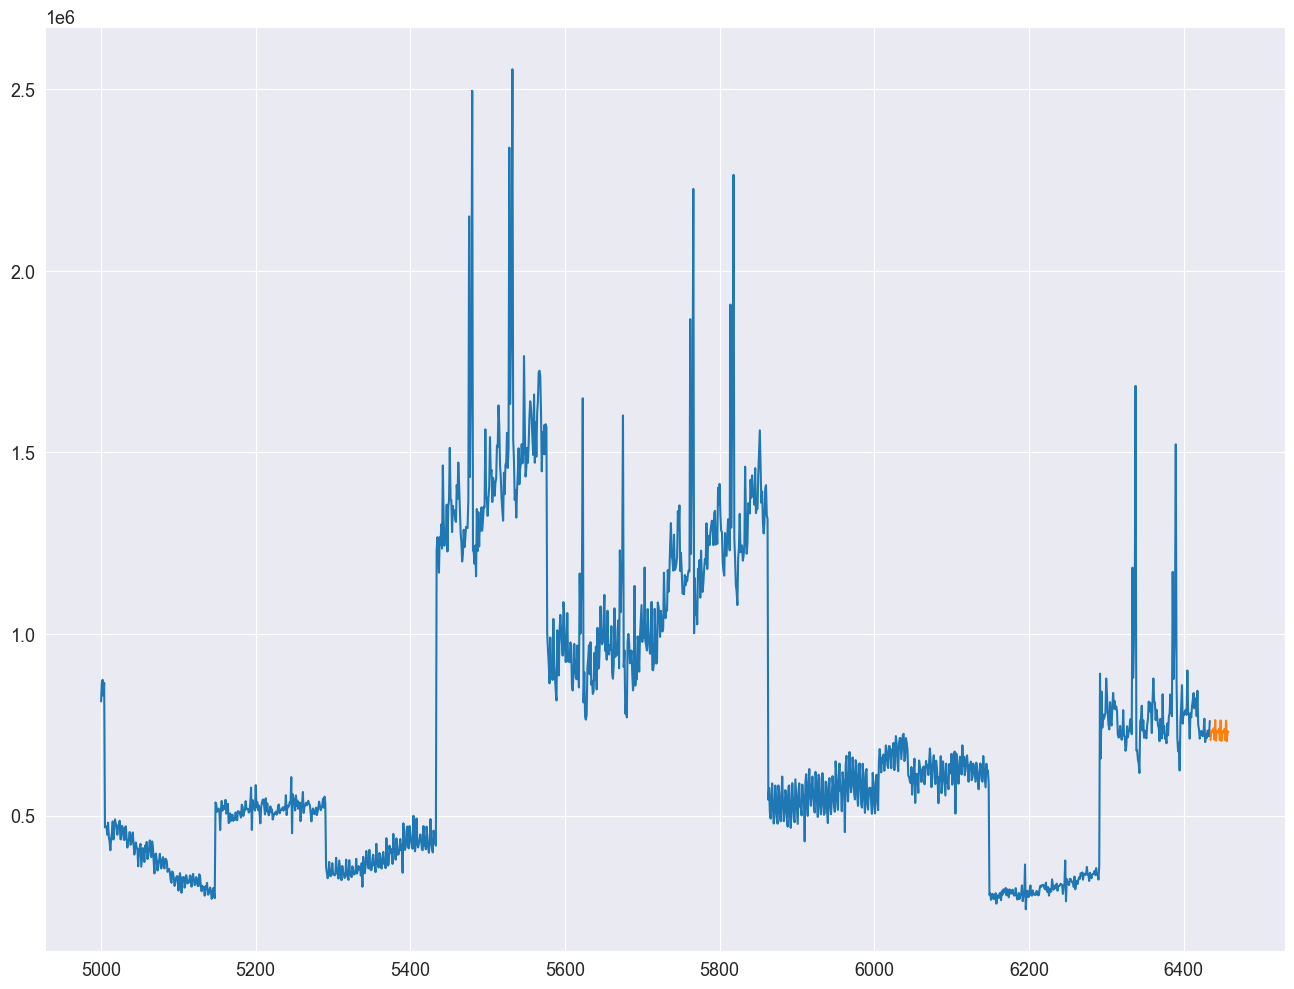

In [39]:
#Forecasting with Seasonality
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.forecasting.stl import STLForecast

df = w_data[['Weekly_Sales']].iloc[:, 0]

# df.index.freq = df.index.inferred_freq
stlf = STLForecast(df, ARIMA, model_kwargs=dict(order=(1, 1, 0), trend="t"), period=7)
stlf_res = stlf.fit()

forecast = stlf_res.forecast(24)
plt.plot(df)
plt.plot(forecast)
plt.show()
